In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate 
from catboost import CatBoostRegressor
from sklearn.cluster import DBSCAN


from sklearn.model_selection import GridSearchCV
import time


In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [3]:
df_train.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [4]:
missing = df_train.isnull().sum().to_frame(name = "Количество пропущенных значений")
missing

,Количество пропущенных значений
id,0
breath_id,0
R,0
C,0
time_step,0
u_in,0
u_out,0
pressure,0


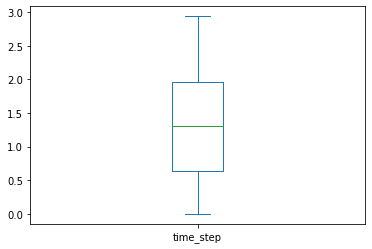

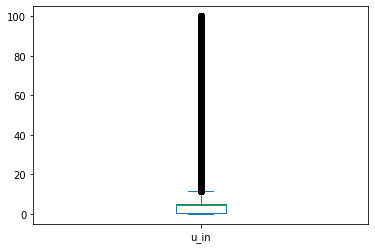

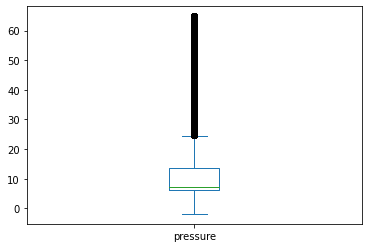

In [10]:
for col in ['time_step', 'u_in', 'pressure']:
    df_train[col].plot(kind='box')
    plt.show()

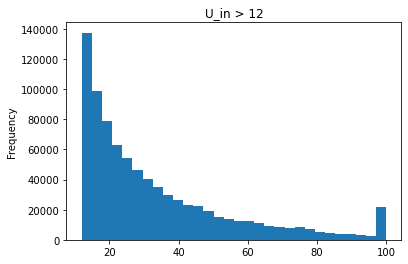

In [83]:
df_train[df_train['u_in'] > 12]['u_in'].plot(kind='hist', bins=30, title='U_in > 12')
plt.show()

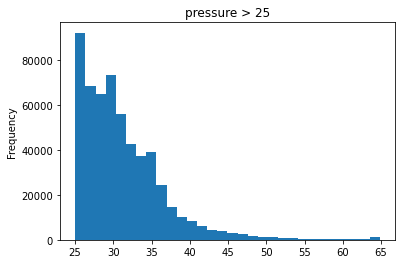

In [86]:
df_train[df_train['pressure'] > 25]['pressure'].plot(kind='hist', bins=30, title='pressure > 25')
plt.show()

In [ ]:
df_train.hist(column=['R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'], bins=80, figsize=(10,10))

In [ ]:
df_train['pressure'].value_counts().sort_index()

<AxesSubplot:>

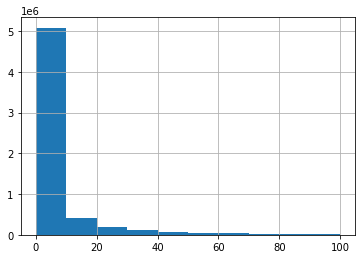

In [16]:
df_train['u_in'].hist()

<AxesSubplot:>

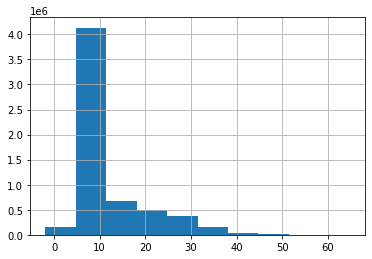

In [17]:
df_train['pressure'].hist()

# Дубликаты

In [3]:
df_dupl = df_train.drop(['id', 'breath_id'], axis=1)
df_dupl.columns

Index(['R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'], dtype='object')

In [4]:
duplicated = df_dupl.duplicated()
print('Total no of duplicate values in Training Dataset = %d' % (duplicated.sum()))

Total no of duplicate values in Training Dataset = 30839


In [5]:
df_train[duplicated].head(10)

,id,breath_id,R,C,time_step,u_in,u_out,pressure
2000,2001,29,50,20,0.0,0.0,0,6.399909
5360,5361,84,50,50,0.0,0.0,0,6.610815
7600,7601,135,50,50,0.0,0.0,0,6.821722
7920,7921,142,50,50,0.0,0.0,0,6.329607
9280,9281,164,50,10,0.0,0.0,0,6.399909
9680,9681,170,20,50,0.0,0.0,0,6.329607
9840,9841,173,50,50,0.0,0.0,0,6.259305
10000,10001,176,50,50,0.0,0.0,0,6.470211
10240,10241,181,50,20,0.0,0.0,0,6.892024
11680,11681,208,50,50,0.0,0.0,0,6.610815


In [6]:
df_train = df_train.drop_duplicates(subset=['R', 'C', 'time_step', 'u_in', 'u_out', 'pressure'])

In [7]:
df_train.shape

(6005161, 8)

# Обработка выбросов

In [ ]:
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(df_train)
list(clusters).count(-1)

In [18]:
outliers = df_train[df_train['pressure'] >= 24.608164540543818 ]
outliers.shape

(594643, 8)

In [29]:
outliers.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
166,167,3,50,20,0.191693,15.353111,0,27.842063
167,168,3,50,20,0.223502,13.641899,0,27.209344
168,169,3,50,20,0.255286,12.336795,0,26.365718
169,170,3,50,20,0.287100,11.487085,0,25.311186
172,173,3,50,20,0.382995,9.949995,0,25.592395


In [8]:
def outlier_detect_IQR(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lower = data[col].quantile(0.25) - (threshold * IQR)
    upper = data[col].quantile(0.75) + (threshold * IQR)
    borders = (upper, lower)
    emiss = pd.concat([data[col] > upper, data[col] < lower], axis=1)
    outlier_index = emiss.any(axis=1)
    print('Количество выбросов в данных: ', outlier_index.value_counts()[1])
    print('Доля выбросов: ', outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, borders

In [9]:
index, para = outlier_detect_IQR(data = df_train, col = 'pressure', threshold = 1.5)
print('Верхняя граница: ', para[0], '\nНижняя граница: ', para[1])

Количество выбросов в данных:  594709
Доля выбросов:  0.09852700463883367
Верхняя граница:  24.608164540543818 
Нижняя граница:  -4.637527967162071


In [10]:
def impute_outlier_with_arbitrary(data, outlier_index, value, col=[]):
    #data_copy = data.copy()
    #for i in col: 
    #    data_copy.loc[outlier_index, i] = value
    #return data_copy
    
    #data_copy = data.copy()
    #for i in col:
    #    data_copy = data_copy.drop(np.where(data_copy[i] > value)[0], axis=0)
    
    data_copy = data.copy()
    for i in col:
        outliers = data_copy[data_copy[i] > value].index
    data_copy = data_copy.drop(outliers, axis=0)
    
    return data_copy

In [11]:
df_train = impute_outlier_with_arbitrary(data=df_train, outlier_index=index, value=11.72, col=['pressure'])

In [12]:
df_train.shape

(4316851, 8)

<AxesSubplot:>

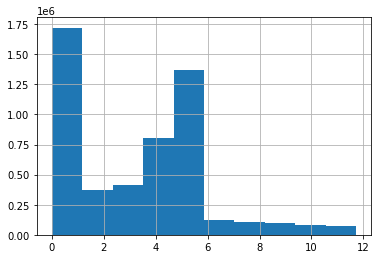

In [12]:
#df_train_with_repl_1['pressure'].hist()
df_train['u_in'].hist()

In [23]:
#df_train_with_repl_1.shape
df_train.shape

(5443594, 8)

In [48]:
df_train_with_repl_1.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [49]:
index_uin, para_uin = outlier_detect_IQR(data = df_train_with_repl_1, col = 'u_in', threshold = 1.5)
print('Верхняя граница: ', para_uin[0], '\nНижняя граница: ', para_uin[1])

Количество выбросов в данных:  636056
Доля выбросов:  0.11618798144809357
Верхняя граница:  11.537159772063863 
Нижняя граница:  -5.978836822616379


In [52]:
df_train_with_repl_1 = impute_outlier_with_arbitrary(data=df_train_with_repl_1, outlier_index=index_uin, value=12, col=['u_in'])


KeyError: '[   1145    1146    1147 ... 5472895 5473868 5473872] not found in axis'

In [18]:
index_pressure, para_pressure = outlier_detect_IQR(data = df_train, col = 'pressure', threshold = 1)
print('Верхняя граница: ', para[0], '\nНижняя граница: ', para[1])

Количество выбросов в данных:  837439
Доля выбросов:  0.13874072233267065
Верхняя граница:  24.608164540543818 
Нижняя граница:  -4.637527967162071


In [ ]:
df_train.loc[index, 'u_in'].sort_values()

In [ ]:
def show_correlogram(df):
    plt.figure(figsize=(6,6), dpi= 80)
    sns.heatmap(
        df.corr(), xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True, cbar=False
    )
    plt.title('Correlogram between features', fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

In [ ]:
df_for_corr = df_train.drop(['id', 'breath_id'], axis=1)
show_correlogram(df_for_corr)

In [ ]:
unique_breaths = len(df_train.breath_id.unique())
print("Count of Breaths:", unique_breaths)

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(211)
plt.plot(df_train.pressure[:2000], linewidth = 2, color = 'r', label="pressure")
plt.plot(df_train.u_in[:2000], linewidth = 2, color = 'g', label="u_in")
plt.legend()
plt.subplot(212)
plt.plot(df_train.u_out[:2000], linewidth = 3, label="u_out")
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(df_train.pressure[:240], linewidth = 2, color = 'r', label="pressure")
plt.plot(df_train.u_in[:240], linewidth = 2, color = 'g', label="u_in")
plt.xticks(np.arange(0, 241, 10))
plt.xlim([-1, 241])
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [19]:
def smape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(2 * np.abs(actual - pred) / (np.abs(actual) + np.abs(pred))) * 100

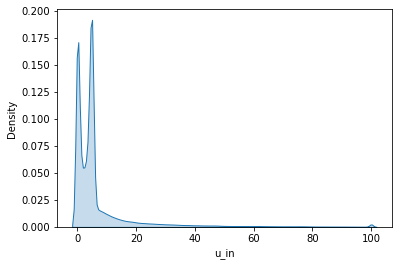

In [48]:
plot1 = sns.kdeplot(X_train['u_in'], shade=True)
fig1 = plot1.get_figure()

# Добавление новых признаков

In [8]:
def add_features(df):
    #df['u_in_rolling_mean_3'] = df.groupby('breath_id')['u_in'].shift().rolling(3).mean()
    #df['u_in_rolling_mean_5'] = df.groupby('breath_id')['u_in'].shift().rolling(5).mean()
    
    df['u_in_cumsum'] = df['u_in'].groupby(df['breath_id']).cumsum()
        
    df['u_in_median'] = df.groupby('breath_id')['u_in'].transform('median')
    df['u_in_max'] = df.groupby('breath_id')['u_in'].transform('max')
    df['u_in_min'] = df.groupby('breath_id')['u_in'].transform('min')
    df['u_in_begin'] = df.groupby('breath_id')['u_in'].transform('first')
    df['u_in_end'] = df.groupby('breath_id')['u_in'].transform('last')
    
    
    df['u_in_lag_1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_in_lag_2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_in_lag_3'] = df.groupby('breath_id')['u_in'].shift(3)
    
    df = df.fillna(0)
    df = df.drop([
                    'id',
                    'breath_id', 
                    #'u_in', 
                    #'u_out'
                ], 
                    axis=1)
    return df

# Разделение данных на 3 датасета

In [9]:


#datas = df_train.copy()
#datas.drop(
#           columns=["id", "breath_id"], 
#           axis = 0, 
#           inplace = True)

#datas = df_train_with_repl_1.copy()

datas = df_train.copy()

datas = add_features(datas)
X = datas.drop(columns=[
                            "pressure", 
                            #"id", 
                            #"breath_id"
                        ])
#X = add_features(X)
y = datas["pressure"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X_train all: ", X_train.shape,
      "\ny_train all: ", y_train.shape,
      "\nX_test all: ", X_test.shape,
      "\ny_test all: ", y_test.shape
     )

X_1kk = X[:1000000]
y_1kk = y[:1000000]
X_train_1kk, X_test_1kk, y_train_1kk, y_test_1kk = train_test_split(X_1kk, y_1kk, test_size=0.1, random_state=42)
print("X_train_1kk: ", X_train_1kk.shape,
      "\ny_train_1kk: ", y_train_1kk.shape,
      "\nX_test_1kk: ", X_test_1kk.shape,
      "\ny_test_1kk: ", y_test_1kk.shape
     )

X_100k = X[:100000]
y_100k = y[:100000]
X_train_100k, X_test_100k, y_train_100k, y_test_100k = train_test_split(X_100k, y_100k, test_size=0.1, random_state=42)
print("X_train 100k: ", X_train_100k.shape,
      "\ny_train 100k: ", y_train_100k.shape,
      "\nX_test 100k: ", X_test_100k.shape,
      "\ny_test 100k: ", y_test_100k.shape
     )

X_train all:  (4503870, 14) 
y_train all:  (4503870,) 
X_test all:  (1501291, 14) 
y_test all:  (1501291,)
X_train_1kk:  (900000, 14) 
y_train_1kk:  (900000,) 
X_test_1kk:  (100000, 14) 
y_test_1kk:  (100000,)
X_train 100k:  (90000, 14) 
y_train 100k:  (90000,) 
X_test 100k:  (10000, 14) 
y_test 100k:  (10000,)


In [10]:
datas

,R,C,time_step,u_in,u_out,pressure,u_in_cumsum,u_in_median,u_in_max,u_in_min,u_in_begin,u_in_end,u_in_lag_1,u_in_lag_2,u_in_lag_3
0,20,50,0.000000,0.083334,0,5.837492,0.083334,4.922568,28.313036,0.0,0.083334,4.987079,0.000000,0.000000,0.000000
1,20,50,0.033652,18.383041,0,5.907794,18.466375,4.922568,28.313036,0.0,0.083334,4.987079,0.083334,0.000000,0.000000
2,20,50,0.067514,22.509278,0,7.876254,40.975653,4.922568,28.313036,0.0,0.083334,4.987079,18.383041,0.083334,0.000000
3,20,50,0.101542,22.808822,0,11.742872,63.784476,4.922568,28.313036,0.0,0.083334,4.987079,22.509278,18.383041,0.083334
4,20,50,0.135756,25.355850,0,12.234987,89.140326,4.922568,28.313036,0.0,0.083334,4.987079,22.808822,22.509278,18.383041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,50,10,2.504603,1.489714,1,3.869032,387.109297,1.694180,25.504196,0.0,6.030572,1.482739,1.420711,1.353205,1.357586
6035996,50,10,2.537961,1.488497,1,3.869032,388.597794,1.694180,25.504196,0.0,6.030572,1.482739,1.489714,1.420711,1.353205
6035997,50,10,2.571408,1.558978,1,3.798729,390.156772,1.694180,25.504196,0.0,6.030572,1.482739,1.488497,1.489714,1.420711
6035998,50,10,2.604744,1.272663,1,4.079938,391.429435,1.694180,25.504196,0.0,6.030572,1.482739,1.558978,1.488497,1.489714


<AxesSubplot:>

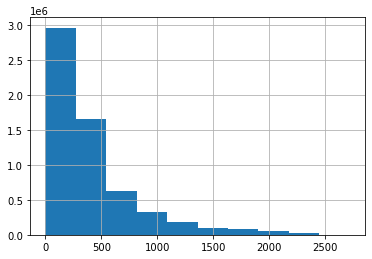

In [72]:
datas['u_in_cumsum'].hist()

# Масштабирование данных

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


ss1 = StandardScaler().fit(X_train_1kk)
X_train_1kk = ss1.transform(X_train_1kk)
X_test_1kk = ss1.transform(X_test_1kk)

ss2 = StandardScaler().fit(X_train_100k)
X_train_100k = ss2.transform(X_train_100k)
X_test_100k = ss2.transform(X_test_100k)

ss4 = StandardScaler().fit(X)
X = ss4.transform(X)

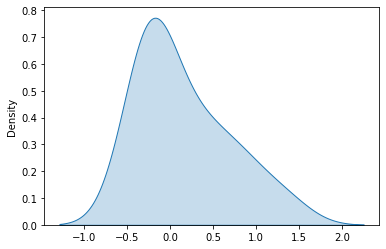

In [12]:
plot2 = sns.kdeplot(X_train[5], shade=True)
fig2 = plot2.get_figure()

In [13]:
def sec_to_min(sec):
    min = sec // 60
    s = (sec / 60 - min) * 60
    return (min, s)

In [14]:
def train_predict(model, X_fit, y_fit, X_predict):
    model.fit(X_fit, y_fit)
    pred = model.predict(X_predict)
    return pred

In [15]:
def print_score(y_pred, pred, time):
    t = sec_to_min(time)
    mae_error = mean_absolute_error(y_pred, pred) 
    print(f'MAE Score: {round(mae_error, 3)}')
    print(f'     Time: {round(t[0])} min {round(t[1])} sec')   

# Дерево принятия решений

## Обучение модели без настройки параметров

### 100 000 данных

In [82]:
t_start = time.time()

dt_100k_without = DecisionTreeRegressor(
                            random_state = 42
                            )

dt_pred_100k_without = train_predict(dt1_100k_without, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [84]:
print_score(y_test_100k, dt_pred_100k_without, t_end - t_start)

MAE Score: 0.552
     Time: 0 min 2 sec


### 1 000 000 данных 

In [85]:
t_start = time.time()

dt_1kk_without = DecisionTreeRegressor(
                            random_state = 42
                            )

dt_pred_1kk_without = train_predict(dt_1kk_without, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [86]:
print_score(y_test_1kk, dt_pred_1kk_without, t_end - t_start)

MAE Score: 0.44
     Time: 0 min 27 sec


### 6 036 000 данных

In [87]:
t_start = time.time()

dt_6kk_without = DecisionTreeRegressor(
                            random_state = 42
                            )

dt_pred_6kk_without = train_predict(dt_6kk_without, X_train, y_train, X_test)

t_end = time.time()

In [88]:
print_score(y_test, dt_pred_6kk_without, t_end - t_start)

MAE Score: 0.375
     Time: 2 min 45 sec


In [135]:
dt_feat = pd.DataFrame(dt1.feature_importances_, index=X_train_1kk.columns, columns=['feat_importance'])
dt_feat.sort_values('feat_importance').tail(8).plot.barh(figsize=(14, 6), color='green')
plt.show()
#pd.DataFrame(
#    dt1.feature_importances_, index=X_train_1kk.columns, columns=['importances']
#).sort_values(by='importances').plot(kind='barh', figsize=(8, 6), title='CatBoost feature importances')
#plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'column'

## Настройка гиперпараметров

In [120]:
def settings_params(param_grid, model, X_fit, y_fit):
    
    t_start = time.time()
    grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, n_jobs = -1, verbose = 2) 
    grid.fit(X_fit, y_fit)
    t_end = time.time()
    t = t_end - t_start
    return grid, t

In [125]:
def print_grid_search(grid, t):
    best_params = grid.best_params_
    best_score = grid.best_score_
    #t = sec_to_min(t_end - t_start)
    t = sec_to_min(t)

    print(f'Best params: {best_params}') 
    print(f' Best Score: {round(best_score,4)}')
    print(f'       Time: {round(t[0])} min {round(t[1])} sec')

In [113]:
dt_param_grid = {
                    "min_samples_split": [2, 3, 4],
                    "max_depth": [None, 11, 13, 15],
                    "min_samples_leaf": [2, 3, 4],
                }

dt = DecisionTreeRegressor(random_state=42)

dt_grid, t = settings_params(dt_param_grid, dt, X_train_100k, y_train_100k)

ValueError: 'MAE' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [109]:
print_grid_search(dt_grid, t)

Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
 Best Score: -0.6353
       Time: 0 min 44 sec


## Обучение с подобранными параметрами

In [116]:
t_start = time.time()

dt1 = DecisionTreeRegressor(
                                min_samples_split = 2,
                                min_samples_leaf = 2,
                                max_depth = None,
                                random_state = 42
                            )

dt_pred = train_predict(dt1, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [117]:
print_score(y_test_1kk, dt_pred, t_end - t_start)

MAE Score: 0.435
     Time: 0 min 25 sec


In [49]:
dt_feat = pd.DataFrame(dt2.feature_importances_, index=X_train_1kk.columns, columns=['feat_importance'])
dt_feat.sort_values('feat_importance').tail(8).plot.barh(figsize=(14, 6), color='green')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# Случайный лес

## Обучение модели без настройки параметров

### 100 000 данных

In [254]:
t_start = time.time()

rf_100k_without = RandomForestRegressor(
                            n_estimators = 10,
                            random_state = 42
                            )

#rf_pred = train_predict(rf1, X_train_100k, y_train_100k, X_test_100k)
rf_100k_without.fit(X_train_100k, y_train_100k)
rf_pred_100k_without = rf_100k_without.predict(X_test_100k)

t_end = time.time()

In [255]:
print_score(y_test_100k, rf_pred_100k_without, t_end - t_start)

MAE Score: 0.454
     Time: 0 min 12 sec


In [270]:
cols = datas.columns
arr = []
for c in cols:
    arr.append(c)
arr.pop(5)
arr

['R',
 'C',
 'time_step',
 'u_in',
 'u_out',
 'u_in_cumsum',
 'u_in_median',
 'u_in_max',
 'u_in_min',
 'u_in_begin',
 'u_in_end',
 'u_in_lag_1',
 'u_in_lag_2',
 'u_in_lag_3']

In [257]:
rf_100k_without.feature_importances_

array([5.17857729e-02, 4.85199317e-02, 4.70381524e-01, 6.65690677e-03,
       2.79062253e-05, 3.18016615e-01, 7.31155467e-03, 8.35416719e-03,
       1.57950284e-04, 4.73768033e-03, 1.46202787e-02, 4.70082649e-03,
       5.56736385e-02, 9.05524691e-03])

### 1 000 000 данных

In [139]:
t_start = time.time()

rf1 = RandomForestRegressor(
                            n_estimators = 10,
                            random_state = 42
                            )

rf_pred = train_predict(rf1, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [140]:
print_score(y_test_1kk, rf_pred, t_end - t_start)

MAE Score: 0.345
     Time: 2 min 49 sec


### 6 036 000 данных

In [229]:
t_start = time.time()

rf_6kk_without = RandomForestRegressor(
                            n_estimators = 10,
                            random_state = 42
                            )

rf_pred_6kk_without = train_predict(rf_6kk_without, X_train, y_train, X_test)

t_end = time.time()

In [230]:
print_score(y_test, rf_pred_6kk_without, t_end - t_start)

MAE Score: 0.294
     Time: 23 min 21 sec


In [253]:
rf_6kk_without.feature_names_in_

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_names_in_'

In [244]:
datas

,R,C,time_step,u_in,u_out,pressure,u_in_cumsum,u_in_median,u_in_max,u_in_min,u_in_begin,u_in_end,u_in_lag_1,u_in_lag_2,u_in_lag_3
0,20,50,0.000000,0.083334,0,5.837492,0.083334,4.922568,28.313036,0.0,0.083334,4.987079,0.000000,0.000000,0.000000
1,20,50,0.033652,18.383041,0,5.907794,18.466375,4.922568,28.313036,0.0,0.083334,4.987079,0.083334,0.000000,0.000000
2,20,50,0.067514,22.509278,0,7.876254,40.975653,4.922568,28.313036,0.0,0.083334,4.987079,18.383041,0.083334,0.000000
3,20,50,0.101542,22.808822,0,11.742872,63.784476,4.922568,28.313036,0.0,0.083334,4.987079,22.509278,18.383041,0.083334
4,20,50,0.135756,25.355850,0,12.234987,89.140326,4.922568,28.313036,0.0,0.083334,4.987079,22.808822,22.509278,18.383041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,50,10,2.504603,1.489714,1,3.869032,387.109297,1.694180,25.504196,0.0,6.030572,1.482739,1.420711,1.353205,1.357586
6035996,50,10,2.537961,1.488497,1,3.869032,388.597794,1.694180,25.504196,0.0,6.030572,1.482739,1.489714,1.420711,1.353205
6035997,50,10,2.571408,1.558978,1,3.798729,390.156772,1.694180,25.504196,0.0,6.030572,1.482739,1.488497,1.489714,1.420711
6035998,50,10,2.604744,1.272663,1,4.079938,391.429435,1.694180,25.504196,0.0,6.030572,1.482739,1.558978,1.488497,1.489714


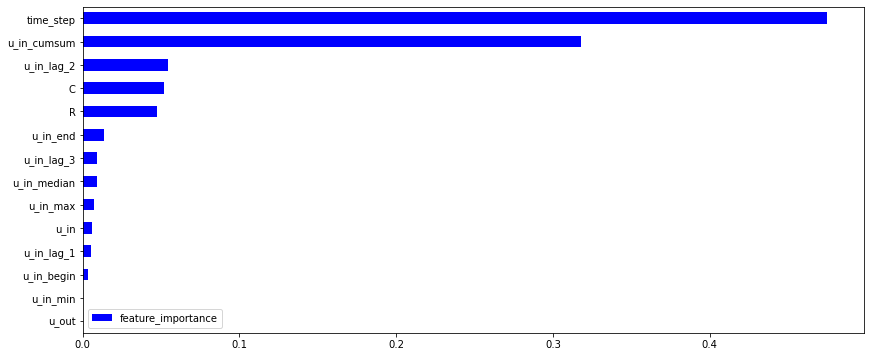

In [273]:
rf_feat = pd.DataFrame(rf_6kk_without.feature_importances_, index=arr, columns=['feature_importance'])
rf_feat.sort_values('feature_importance').plot.barh(figsize=(14, 6), color='blue')
plt.show()
#pd.DataFrame(
#    dt1.feature_importances_, index=X_train_1kk.columns, columns=['importances']
#).sort_values(by='importances').plot(kind='barh', figsize=(8, 6), title='CatBoost feature importances')
#plt.show()

## Настройка гиперпараметров

In [133]:
rf_param_grid = {
                    'n_estimators': [10, 15, 20, 25],
                    'max_features': ['auto', 'sqrt', None],
                    'max_depth': [7] + [None],
                    #'min_samples_split': [2, 3],
                    'min_samples_leaf': [1, 2, 3],
                    #'bootstrap': [True, False]
                }

rf = RandomForestRegressor(random_state=42)

rf_grid, t = settings_params(rf_param_grid, rf, X_train_100k, y_train_100k)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [134]:
print_grid_search(rf_grid, t)

Best params: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 25}
 Best Score: 0.9872
       Time: 9 min 52 sec


## Обучение с подобранными параметрами

In [139]:
t_start = time.time()
rf_100k_with = RandomForestRegressor(
                            n_estimators = 30,
                            random_state = 42,
                            #bootstrap=False,
                            max_depth=None,
                            max_features='auto',
                            min_samples_leaf=1
                           )

rf_pred_100k_with = train_predict(rf_100k_with, X_train_100k, y_train_100k, X_test_100k)
t_end = time.time()

In [140]:
print_score(y_test_100k, rf_pred_100k_with, t_end - t_start)

MAE Score: 0.424
     Time: 0 min 37 sec


In [200]:
t_start = time.time()
rf_6kk_with_11_depth = RandomForestRegressor(
                            n_estimators = 11,
                            random_state = 42,
                           )

rf_pred_6kk_with_11_depth = train_predict(rf_6kk_with_11_depth, X_train, y_train, X_test)
t_end = time.time()

In [201]:
print_score(y_test, rf_pred_6kk_with_11_depth, t_end - t_start)

MAE Score: 0.292
     Time: 29 min 16 sec


# k-ближайших соседей

## Обучение модели без настройки параметров

### 100 000 данных

In [141]:
t_start = time.time()

knn_100k_without = KNeighborsRegressor()

knn_pred_100k_without = train_predict(knn_100k_without, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [142]:
print_score(y_test_100k, knn_pred_100k_without, t_end - t_start)

MAE Score: 0.563
     Time: 0 min 32 sec


### 1 000 000 данных

In [ ]:
t_start = time.time()

knn1 = KNeighborsRegressor()

knn_pred = train_predict(knn1, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [ ]:
print_score(y_test_1kk, knn_pred, t_end - t_start)

### 6 036 000 данных

In [ ]:
t_start = time.time()
knn1 = KNeighborsRegressor()
knn1.fit(X_train, y_train)
knn_pred = knn1.predict(X_test)
t_end = time.time()

In [ ]:
t = sec_to_min(t_end - t_start)
knn_mae_error = mean_absolute_error(y_test, knn_pred) 
knn_r2_score = r2_score(y_test, knn_pred)

print(f'MAE Score: {round(knn_mae_error, 3)}') 
print(f' R2 Score: {round(knn_r2_score, 4)}')
print(f'     Time: {round(t[0])} min {round(t[1])} sec')

## Настройка гиперпараметров

In [150]:
knn_param_grid = {
                    #'n_neighbors': range(1,10),
                    'n_neighbors': [2, 3, 4],
                    'weights': ['uniform', 'distance'],
                    'metric': ['euclidean', 'manhattan']
                }

knn = KNeighborsRegressor()

knn_grid, t = settings_params(knn_param_grid, knn, X_train_100k, y_train_100k)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [151]:
print_grid_search(knn_grid, t)

Best params: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
 Best Score: 0.9629
       Time: 10 min 59 sec


# Обучение с подобранными параметрами

In [152]:
t_start = time.time()

knn_100k_with = KNeighborsRegressor(
                                            metric='manhattan',
                                            n_neighbors=2,
                                            weights='distance',
                                        )

knn_pred_100k_with = train_predict(knn_100k_without, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [153]:
print_score(y_test_100k, knn_pred_100k_with, t_end - t_start)

MAE Score: 0.563
     Time: 0 min 30 sec


# Градиентный бустинг LightGBM

## Обучение без подбора параметров

### 100 000 данных

In [154]:
t_start = time.time()

lgb_100k_without = LGBMRegressor(
                            random_state = 42
                            )

lgb_pred_100k_without = train_predict(lgb_100k_without, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [155]:
print_score(y_test_100k, lgb_pred_100k_without, t_end - t_start)

MAE Score: 0.74
     Time: 0 min 1 sec


### 1 000 000 данных

In [164]:
t_start = time.time()

lgb_1kk_without = LGBMRegressor(
                            random_state = 42
                            )

lgb_pred_1kk_without = train_predict(lgb_1kk_without, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [168]:
print_score(y_test_1kk, lgb_pred_1kk_without, t_end - t_start)

MAE Score: 0.742
     Time: 0 min 40 sec


### 6 036 000 данных

In [166]:
t_start = time.time()

lgb_6kk_without = LGBMRegressor(
                            random_state = 42
                            )

lgb_pred_6kk_without = train_predict(lgb_6kk_without, X_train, y_train, X_test)

t_end = time.time()

In [167]:
print_score(y_test, lgb_pred_6kk_without, t_end - t_start)

MAE Score: 0.742
     Time: 0 min 40 sec


## Настройка гиперпараметров

In [175]:
lgb_param_grid = {
                    'num_leaves': [25, 30],
                    'learning_rate': [1, 0.5],
                    'max_depth': [5, 7],
                    'n_estimators': [300, 500]
                }

lgb = LGBMRegressor(random_state=42)

lgb_grid, t = settings_params(lgb_param_grid, lgb, X_train_100k, y_train_100k)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [176]:
print_grid_search(lgb_grid, t)

Best params: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 500, 'num_leaves': 30}
 Best Score: 0.9891
       Time: 1 min 45 sec


## Обучение с подобранными параметрами

In [181]:
t_start = time.time()

lgb_100k_with = LGBMRegressor(
                                random_state = 42,
                                n_estimators = 500,
                                max_depth = 7,
                                num_leaves = 30,
                                learning_rate=0.5
                            )

lgb_pred_100k_with = train_predict(lgb_100k_with, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [182]:
print_score(y_test_100k, lgb_pred_100k_with, t_end - t_start)

MAE Score: 0.47
     Time: 0 min 3 sec


In [195]:
t_start = time.time()

lgb_1kk_with = LGBMRegressor(
                                random_state = 42,
                                n_estimators = 500,
                                max_depth = 7,
                                num_leaves = 30,
                                learning_rate=0.5
                            )

lgb_pred_1kk_with = train_predict(lgb_1kk_with, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [196]:
print_score(y_test_1kk, lgb_pred_1kk_with, t_end - t_start)

MAE Score: 0.501
     Time: 0 min 24 sec


# Градиентный бустинг XGBoost

## Обучение без подбора параметров

### 100 000 данных

In [169]:
t_start = time.time()

xgb_100k_without = XGBRegressor(
                            random_state = 42
                            )

xgb_pred_100k_without = train_predict(xgb_100k_without, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [170]:
print_score(y_test_100k, xgb_pred_100k_without, t_end - t_start)

MAE Score: 0.61
     Time: 0 min 15 sec


### 1 000 000 данных

In [171]:
t_start = time.time()

xgb_1kk_without = XGBRegressor(
                            random_state = 42
                            )

xgb_pred_1kk_without = train_predict(xgb_1kk_without, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [173]:
print_score(y_test_1kk, xgb_pred_1kk_without, t_end - t_start)

MAE Score: 0.634
     Time: 3 min 2 sec


### 6 036 000 данных

In [ ]:
t_start = time.time()

xgb_6kk_without = XGBRegressor(
                            random_state = 42
                            )

xgb_pred_6kk_without = train_predict(xgb_6kk_without, X_train, y_train, X_test)

t_end = time.time()

In [ ]:
print_score(y_test, xgb_pred_6kk_without, t_end - t_start)

## Настройка гиперпараметров

In [183]:
xgb_param_grid = {
                    'num_leaves': [25, 30],
                    'learning_rate': [1, 0.5],
                    'max_depth': [5, 7],
                    'n_estimators': [300, 500]
                }

xgb = XGBRegressor(random_state=42)

gb_grid, t = settings_params(xgb_param_grid, xgb, X_train_100k, y_train_100k)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

In [ ]:
print_grid_search(xgb_grid, t)

## Обучение с подобранными параметрами

In [193]:
t_start = time.time()

xgb_100k_with = XGBRegressor(
                                random_state = 42,
                                n_estimators = 500,
                                max_depth = 7,
                                #num_leaves = 30,
                                learning_rate=0.5
                            )

xgb_pred_100k_with = train_predict(xgb_100k_with, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [194]:
print_score(y_test_100k, xgb_pred_100k_with, t_end - t_start)

MAE Score: 0.489
     Time: 1 min 21 sec


# Градиентный бустинг GradientBoostingRegressor

## Обучение моделей до подбора параметров

### 100 000 данных

In [187]:
t_start = time.time()

gb_100k_without = GradientBoostingRegressor()

gb_pred_100k_without = train_predict(gb_100k_without, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [188]:
print_score(y_test_100k, gb_pred_100k_without, t_end - t_start)

MAE Score: 1.308
     Time: 0 min 36 sec


### 1 000 000 данных

In [189]:
t_start = time.time()

gb_1kk_without = GradientBoostingRegressor()

gb_pred_1kk_without = train_predict(gb_1kk_without, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

In [190]:
print_score(y_test_1kk, gb_pred_1kk_without, t_end - t_start)

MAE Score: 1.262
     Time: 8 min 29 sec


## Настройка гиперпараметров

In [ ]:
gb_param_grid = {
                    'num_leaves': [25, 30],
                    'learning_rate': [1, 0.5],
                    'max_depth': [5, 7],
                    'n_estimators': [300, 500]
                }

gb = LGBMRegressor(random_state=42)

gb_grid, t = settings_params(gb_param_grid, gb, X_train_100k, y_train_100k)

In [ ]:
best_params = gb_grid.best_params_
best_score = gb_grid.best_score_
t = sec_to_min(t_end - t_start)

print(f'Best params: {best_params}') 
print(f' Best Score: {round(best_score,4)}')
print(f'       Time: {round(t[0])} min {round(t[1])} sec')

## Обучение модели с пообранными параметрами

In [191]:
t_start = time.time()

gb_100k_with = GradientBoostingRegressor(
                                                random_state = 42,
                                                n_estimators = 500,
                                                max_depth = 7,
                                                learning_rate=0.5
                                            )

gb_pred_100k_with = train_predict(gb_100k_with, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

In [192]:
print_score(y_test_100k, gb_pred_100k_with, t_end - t_start)

MAE Score: 0.503
     Time: 6 min 21 sec


# CatBoostRegressor

### 100 000 данных

In [26]:
t_start = time.time()

cb1 = CatBoostRegressor(random_state=42)

cb_pred = train_predict(cb1, X_train_100k, y_train_100k, X_test_100k)

t_end = time.time()

Learning rate set to 0.083358
0:	learn: 7.7565235	total: 260ms	remaining: 4m 20s
1:	learn: 7.2519471	total: 286ms	remaining: 2m 22s
2:	learn: 6.8013315	total: 306ms	remaining: 1m 41s
3:	learn: 6.3947115	total: 326ms	remaining: 1m 21s
4:	learn: 6.0201479	total: 346ms	remaining: 1m 8s
5:	learn: 5.6787245	total: 364ms	remaining: 1m
6:	learn: 5.3835193	total: 384ms	remaining: 54.5s
7:	learn: 5.0913532	total: 404ms	remaining: 50.1s
8:	learn: 4.8316544	total: 423ms	remaining: 46.6s
9:	learn: 4.6003081	total: 443ms	remaining: 43.8s
10:	learn: 4.3816004	total: 471ms	remaining: 42.3s
11:	learn: 4.1884305	total: 496ms	remaining: 40.8s
12:	learn: 4.0204658	total: 517ms	remaining: 39.3s
13:	learn: 3.8534489	total: 538ms	remaining: 37.9s
14:	learn: 3.7079102	total: 558ms	remaining: 36.7s
15:	learn: 3.5775459	total: 577ms	remaining: 35.5s
16:	learn: 3.4675170	total: 596ms	remaining: 34.5s
17:	learn: 3.3542447	total: 615ms	remaining: 33.5s
18:	learn: 3.2507916	total: 634ms	remaining: 32.7s
19:	learn:

168:	learn: 1.4519996	total: 3.68s	remaining: 18.1s
169:	learn: 1.4485534	total: 3.7s	remaining: 18.1s
170:	learn: 1.4465999	total: 3.73s	remaining: 18.1s
171:	learn: 1.4443292	total: 3.74s	remaining: 18s
172:	learn: 1.4407918	total: 3.77s	remaining: 18s
173:	learn: 1.4381248	total: 3.78s	remaining: 18s
174:	learn: 1.4352263	total: 3.81s	remaining: 18s
175:	learn: 1.4338146	total: 3.83s	remaining: 17.9s
176:	learn: 1.4312950	total: 3.85s	remaining: 17.9s
177:	learn: 1.4297333	total: 3.87s	remaining: 17.9s
178:	learn: 1.4263107	total: 3.9s	remaining: 17.9s
179:	learn: 1.4236164	total: 3.92s	remaining: 17.8s
180:	learn: 1.4209646	total: 3.93s	remaining: 17.8s
181:	learn: 1.4187786	total: 3.95s	remaining: 17.8s
182:	learn: 1.4143084	total: 3.97s	remaining: 17.7s
183:	learn: 1.4122054	total: 3.99s	remaining: 17.7s
184:	learn: 1.4097275	total: 4.01s	remaining: 17.7s
185:	learn: 1.4059380	total: 4.03s	remaining: 17.6s
186:	learn: 1.4038481	total: 4.04s	remaining: 17.6s
187:	learn: 1.4026813	

336:	learn: 1.1737393	total: 7.25s	remaining: 14.3s
337:	learn: 1.1727521	total: 7.27s	remaining: 14.2s
338:	learn: 1.1719761	total: 7.29s	remaining: 14.2s
339:	learn: 1.1711867	total: 7.31s	remaining: 14.2s
340:	learn: 1.1703830	total: 7.33s	remaining: 14.2s
341:	learn: 1.1692285	total: 7.35s	remaining: 14.1s
342:	learn: 1.1686468	total: 7.37s	remaining: 14.1s
343:	learn: 1.1681928	total: 7.38s	remaining: 14.1s
344:	learn: 1.1670402	total: 7.4s	remaining: 14.1s
345:	learn: 1.1654400	total: 7.42s	remaining: 14s
346:	learn: 1.1649558	total: 7.43s	remaining: 14s
347:	learn: 1.1643451	total: 7.45s	remaining: 14s
348:	learn: 1.1633262	total: 7.47s	remaining: 13.9s
349:	learn: 1.1617118	total: 7.49s	remaining: 13.9s
350:	learn: 1.1606761	total: 7.52s	remaining: 13.9s
351:	learn: 1.1580603	total: 7.54s	remaining: 13.9s
352:	learn: 1.1572559	total: 7.55s	remaining: 13.8s
353:	learn: 1.1567232	total: 7.57s	remaining: 13.8s
354:	learn: 1.1558620	total: 7.59s	remaining: 13.8s
355:	learn: 1.15518

503:	learn: 1.0317789	total: 10.5s	remaining: 10.3s
504:	learn: 1.0315963	total: 10.5s	remaining: 10.3s
505:	learn: 1.0305431	total: 10.5s	remaining: 10.3s
506:	learn: 1.0298561	total: 10.5s	remaining: 10.2s
507:	learn: 1.0295108	total: 10.5s	remaining: 10.2s
508:	learn: 1.0285797	total: 10.6s	remaining: 10.2s
509:	learn: 1.0281912	total: 10.6s	remaining: 10.2s
510:	learn: 1.0272296	total: 10.6s	remaining: 10.1s
511:	learn: 1.0268809	total: 10.6s	remaining: 10.1s
512:	learn: 1.0258955	total: 10.6s	remaining: 10.1s
513:	learn: 1.0257367	total: 10.7s	remaining: 10.1s
514:	learn: 1.0252430	total: 10.7s	remaining: 10.1s
515:	learn: 1.0248159	total: 10.7s	remaining: 10s
516:	learn: 1.0240850	total: 10.7s	remaining: 10s
517:	learn: 1.0237336	total: 10.7s	remaining: 9.99s
518:	learn: 1.0229505	total: 10.8s	remaining: 9.97s
519:	learn: 1.0224330	total: 10.8s	remaining: 9.95s
520:	learn: 1.0220130	total: 10.8s	remaining: 9.92s
521:	learn: 1.0211470	total: 10.8s	remaining: 9.9s
522:	learn: 1.020

671:	learn: 0.9392522	total: 13.7s	remaining: 6.68s
672:	learn: 0.9388083	total: 13.7s	remaining: 6.66s
673:	learn: 0.9382482	total: 13.7s	remaining: 6.64s
674:	learn: 0.9377333	total: 13.8s	remaining: 6.62s
675:	learn: 0.9374182	total: 13.8s	remaining: 6.6s
676:	learn: 0.9371822	total: 13.8s	remaining: 6.58s
677:	learn: 0.9364845	total: 13.8s	remaining: 6.56s
678:	learn: 0.9361031	total: 13.8s	remaining: 6.54s
679:	learn: 0.9358528	total: 13.8s	remaining: 6.51s
680:	learn: 0.9355652	total: 13.9s	remaining: 6.49s
681:	learn: 0.9351128	total: 13.9s	remaining: 6.48s
682:	learn: 0.9346227	total: 13.9s	remaining: 6.46s
683:	learn: 0.9340881	total: 13.9s	remaining: 6.43s
684:	learn: 0.9337423	total: 13.9s	remaining: 6.41s
685:	learn: 0.9335626	total: 14s	remaining: 6.39s
686:	learn: 0.9332517	total: 14s	remaining: 6.37s
687:	learn: 0.9326943	total: 14s	remaining: 6.35s
688:	learn: 0.9322884	total: 14s	remaining: 6.33s
689:	learn: 0.9317453	total: 14s	remaining: 6.3s
690:	learn: 0.9314279	to

837:	learn: 0.8736784	total: 17.4s	remaining: 3.36s
838:	learn: 0.8731303	total: 17.4s	remaining: 3.34s
839:	learn: 0.8726933	total: 17.4s	remaining: 3.32s
840:	learn: 0.8723610	total: 17.5s	remaining: 3.3s
841:	learn: 0.8719482	total: 17.5s	remaining: 3.28s
842:	learn: 0.8717232	total: 17.5s	remaining: 3.26s
843:	learn: 0.8714598	total: 17.5s	remaining: 3.24s
844:	learn: 0.8711006	total: 17.5s	remaining: 3.22s
845:	learn: 0.8708917	total: 17.6s	remaining: 3.2s
846:	learn: 0.8704934	total: 17.6s	remaining: 3.18s
847:	learn: 0.8702048	total: 17.6s	remaining: 3.16s
848:	learn: 0.8698658	total: 17.6s	remaining: 3.14s
849:	learn: 0.8693614	total: 17.7s	remaining: 3.12s
850:	learn: 0.8689681	total: 17.7s	remaining: 3.1s
851:	learn: 0.8685609	total: 17.7s	remaining: 3.07s
852:	learn: 0.8683290	total: 17.7s	remaining: 3.05s
853:	learn: 0.8679837	total: 17.7s	remaining: 3.03s
854:	learn: 0.8676529	total: 17.8s	remaining: 3.01s
855:	learn: 0.8674432	total: 17.8s	remaining: 2.99s
856:	learn: 0.8

In [28]:
print_score(y_test_100k, cb_pred, t_end - t_start)

MAE Score: 0.569
     Time: 0 min 22 sec


In [29]:
t_start = time.time()

cb1 = CatBoostRegressor(random_state=42)

cb_pred = train_predict(cb1, X_train_1kk, y_train_1kk, X_test_1kk)

t_end = time.time()

Learning rate set to 0.119936
0:	learn: 7.3816158	total: 237ms	remaining: 3m 56s
1:	learn: 6.7169604	total: 393ms	remaining: 3m 15s
2:	learn: 6.1197452	total: 561ms	remaining: 3m 6s
3:	learn: 5.6098820	total: 737ms	remaining: 3m 3s
4:	learn: 5.1551610	total: 903ms	remaining: 2m 59s
5:	learn: 4.7720546	total: 1.05s	remaining: 2m 54s
6:	learn: 4.4401748	total: 1.22s	remaining: 2m 53s
7:	learn: 4.1497051	total: 1.42s	remaining: 2m 55s
8:	learn: 3.8928634	total: 1.58s	remaining: 2m 53s
9:	learn: 3.6711241	total: 1.74s	remaining: 2m 52s
10:	learn: 3.4984648	total: 1.9s	remaining: 2m 50s
11:	learn: 3.3277171	total: 2.06s	remaining: 2m 49s
12:	learn: 3.1716670	total: 2.23s	remaining: 2m 48s
13:	learn: 3.0413662	total: 2.38s	remaining: 2m 47s
14:	learn: 2.9249839	total: 2.55s	remaining: 2m 47s
15:	learn: 2.8357313	total: 2.71s	remaining: 2m 46s
16:	learn: 2.7473643	total: 2.88s	remaining: 2m 46s
17:	learn: 2.6705659	total: 3.02s	remaining: 2m 44s
18:	learn: 2.6046360	total: 3.19s	remaining: 2m

157:	learn: 1.3454111	total: 24.7s	remaining: 2m 11s
158:	learn: 1.3429427	total: 24.8s	remaining: 2m 11s
159:	learn: 1.3375624	total: 25s	remaining: 2m 11s
160:	learn: 1.3356098	total: 25.1s	remaining: 2m 10s
161:	learn: 1.3328951	total: 25.3s	remaining: 2m 10s
162:	learn: 1.3310628	total: 25.4s	remaining: 2m 10s
163:	learn: 1.3297148	total: 25.6s	remaining: 2m 10s
164:	learn: 1.3277178	total: 25.7s	remaining: 2m 10s
165:	learn: 1.3258294	total: 25.9s	remaining: 2m 10s
166:	learn: 1.3241771	total: 26s	remaining: 2m 9s
167:	learn: 1.3227824	total: 26.2s	remaining: 2m 9s
168:	learn: 1.3193108	total: 26.3s	remaining: 2m 9s
169:	learn: 1.3168176	total: 26.5s	remaining: 2m 9s
170:	learn: 1.3152930	total: 26.6s	remaining: 2m 9s
171:	learn: 1.3128129	total: 26.8s	remaining: 2m 8s
172:	learn: 1.3108883	total: 27s	remaining: 2m 8s
173:	learn: 1.3087587	total: 27.1s	remaining: 2m 8s
174:	learn: 1.3075365	total: 27.2s	remaining: 2m 8s
175:	learn: 1.3062958	total: 27.4s	remaining: 2m 8s
176:	lear

314:	learn: 1.1422388	total: 48.6s	remaining: 1m 45s
315:	learn: 1.1418617	total: 48.7s	remaining: 1m 45s
316:	learn: 1.1409589	total: 48.9s	remaining: 1m 45s
317:	learn: 1.1405490	total: 49s	remaining: 1m 45s
318:	learn: 1.1397862	total: 49.1s	remaining: 1m 44s
319:	learn: 1.1392094	total: 49.3s	remaining: 1m 44s
320:	learn: 1.1386531	total: 49.4s	remaining: 1m 44s
321:	learn: 1.1381788	total: 49.6s	remaining: 1m 44s
322:	learn: 1.1377204	total: 49.7s	remaining: 1m 44s
323:	learn: 1.1364406	total: 49.8s	remaining: 1m 43s
324:	learn: 1.1350946	total: 50s	remaining: 1m 43s
325:	learn: 1.1344528	total: 50.1s	remaining: 1m 43s
326:	learn: 1.1336004	total: 50.3s	remaining: 1m 43s
327:	learn: 1.1328666	total: 50.4s	remaining: 1m 43s
328:	learn: 1.1318313	total: 50.6s	remaining: 1m 43s
329:	learn: 1.1307450	total: 50.7s	remaining: 1m 42s
330:	learn: 1.1298903	total: 50.9s	remaining: 1m 42s
331:	learn: 1.1292267	total: 51.1s	remaining: 1m 42s
332:	learn: 1.1275339	total: 51.2s	remaining: 1m 4

470:	learn: 1.0486782	total: 1m 12s	remaining: 1m 21s
471:	learn: 1.0485059	total: 1m 12s	remaining: 1m 21s
472:	learn: 1.0478154	total: 1m 13s	remaining: 1m 21s
473:	learn: 1.0473930	total: 1m 13s	remaining: 1m 21s
474:	learn: 1.0465439	total: 1m 13s	remaining: 1m 21s
475:	learn: 1.0461742	total: 1m 13s	remaining: 1m 20s
476:	learn: 1.0457215	total: 1m 13s	remaining: 1m 20s
477:	learn: 1.0452869	total: 1m 13s	remaining: 1m 20s
478:	learn: 1.0448607	total: 1m 13s	remaining: 1m 20s
479:	learn: 1.0434832	total: 1m 14s	remaining: 1m 20s
480:	learn: 1.0433010	total: 1m 14s	remaining: 1m 20s
481:	learn: 1.0429344	total: 1m 14s	remaining: 1m 19s
482:	learn: 1.0426872	total: 1m 14s	remaining: 1m 19s
483:	learn: 1.0424829	total: 1m 14s	remaining: 1m 19s
484:	learn: 1.0421178	total: 1m 14s	remaining: 1m 19s
485:	learn: 1.0409493	total: 1m 14s	remaining: 1m 19s
486:	learn: 1.0402853	total: 1m 15s	remaining: 1m 19s
487:	learn: 1.0397014	total: 1m 15s	remaining: 1m 18s
488:	learn: 1.0392367	total:

625:	learn: 0.9874652	total: 1m 35s	remaining: 57.3s
626:	learn: 0.9870389	total: 1m 35s	remaining: 57.1s
627:	learn: 0.9868212	total: 1m 36s	remaining: 56.9s
628:	learn: 0.9865954	total: 1m 36s	remaining: 56.8s
629:	learn: 0.9864374	total: 1m 36s	remaining: 56.6s
630:	learn: 0.9856478	total: 1m 36s	remaining: 56.5s
631:	learn: 0.9853699	total: 1m 36s	remaining: 56.3s
632:	learn: 0.9850144	total: 1m 36s	remaining: 56.2s
633:	learn: 0.9848663	total: 1m 37s	remaining: 56s
634:	learn: 0.9845152	total: 1m 37s	remaining: 55.9s
635:	learn: 0.9842752	total: 1m 37s	remaining: 55.7s
636:	learn: 0.9839669	total: 1m 37s	remaining: 55.6s
637:	learn: 0.9832173	total: 1m 37s	remaining: 55.4s
638:	learn: 0.9828986	total: 1m 37s	remaining: 55.2s
639:	learn: 0.9825151	total: 1m 37s	remaining: 55.1s
640:	learn: 0.9823144	total: 1m 38s	remaining: 54.9s
641:	learn: 0.9816242	total: 1m 38s	remaining: 54.8s
642:	learn: 0.9814593	total: 1m 38s	remaining: 54.6s
643:	learn: 0.9812082	total: 1m 38s	remaining: 5

782:	learn: 0.9439189	total: 2m	remaining: 33.4s
783:	learn: 0.9436487	total: 2m	remaining: 33.3s
784:	learn: 0.9432390	total: 2m	remaining: 33.1s
785:	learn: 0.9430992	total: 2m 1s	remaining: 33s
786:	learn: 0.9428742	total: 2m 1s	remaining: 32.8s
787:	learn: 0.9426929	total: 2m 1s	remaining: 32.7s
788:	learn: 0.9425815	total: 2m 1s	remaining: 32.5s
789:	learn: 0.9423916	total: 2m 1s	remaining: 32.3s
790:	learn: 0.9422441	total: 2m 1s	remaining: 32.2s
791:	learn: 0.9419623	total: 2m 1s	remaining: 32s
792:	learn: 0.9418380	total: 2m 2s	remaining: 31.9s
793:	learn: 0.9415076	total: 2m 2s	remaining: 31.7s
794:	learn: 0.9413637	total: 2m 2s	remaining: 31.6s
795:	learn: 0.9409270	total: 2m 2s	remaining: 31.4s
796:	learn: 0.9407600	total: 2m 2s	remaining: 31.3s
797:	learn: 0.9405838	total: 2m 2s	remaining: 31.1s
798:	learn: 0.9403889	total: 2m 3s	remaining: 30.9s
799:	learn: 0.9402343	total: 2m 3s	remaining: 30.8s
800:	learn: 0.9400326	total: 2m 3s	remaining: 30.6s
801:	learn: 0.9397931	tot

940:	learn: 0.9109242	total: 2m 24s	remaining: 9.04s
941:	learn: 0.9107273	total: 2m 24s	remaining: 8.88s
942:	learn: 0.9104541	total: 2m 24s	remaining: 8.73s
943:	learn: 0.9101822	total: 2m 24s	remaining: 8.58s
944:	learn: 0.9100028	total: 2m 24s	remaining: 8.42s
945:	learn: 0.9099202	total: 2m 24s	remaining: 8.27s
946:	learn: 0.9095651	total: 2m 25s	remaining: 8.12s
947:	learn: 0.9093618	total: 2m 25s	remaining: 7.96s
948:	learn: 0.9092724	total: 2m 25s	remaining: 7.81s
949:	learn: 0.9091016	total: 2m 25s	remaining: 7.65s
950:	learn: 0.9088700	total: 2m 25s	remaining: 7.5s
951:	learn: 0.9087380	total: 2m 25s	remaining: 7.35s
952:	learn: 0.9085701	total: 2m 25s	remaining: 7.2s
953:	learn: 0.9081812	total: 2m 26s	remaining: 7.04s
954:	learn: 0.9079769	total: 2m 26s	remaining: 6.89s
955:	learn: 0.9078286	total: 2m 26s	remaining: 6.74s
956:	learn: 0.9075443	total: 2m 26s	remaining: 6.58s
957:	learn: 0.9073868	total: 2m 26s	remaining: 6.43s
958:	learn: 0.9072864	total: 2m 26s	remaining: 6

In [30]:
print_score(y_test_1kk, cb_pred, t_end - t_start)

MAE Score: 0.569
     Time: 2 min 34 sec


In [77]:
t_start = time.time()

cb1 = CatBoostRegressor(random_state=42)

cb_pred = train_predict(cb1, X_train, y_train, X_test)

t_end = time.time()

Learning rate set to 0.154684
0:	learn: 7.1283807	total: 1.03s	remaining: 17m 14s
1:	learn: 6.2974516	total: 1.99s	remaining: 16m 32s
2:	learn: 5.6031141	total: 2.92s	remaining: 16m 11s
3:	learn: 5.0413084	total: 3.65s	remaining: 15m 10s
4:	learn: 4.5689679	total: 4.42s	remaining: 14m 39s
5:	learn: 4.1835464	total: 5.18s	remaining: 14m 18s
6:	learn: 3.8525721	total: 5.95s	remaining: 14m 4s
7:	learn: 3.5945451	total: 6.78s	remaining: 14m 1s
8:	learn: 3.3498171	total: 7.52s	remaining: 13m 47s
9:	learn: 3.1500283	total: 8.28s	remaining: 13m 40s
10:	learn: 2.9908633	total: 9.05s	remaining: 13m 34s
11:	learn: 2.8665047	total: 9.78s	remaining: 13m 25s
12:	learn: 2.7529475	total: 10.5s	remaining: 13m 18s
13:	learn: 2.6620507	total: 11.2s	remaining: 13m 11s
14:	learn: 2.5535054	total: 12s	remaining: 13m 9s
15:	learn: 2.4861544	total: 12.7s	remaining: 13m 1s
16:	learn: 2.4151757	total: 13.4s	remaining: 12m 56s
17:	learn: 2.3585987	total: 14.1s	remaining: 12m 51s
18:	learn: 2.3056864	total: 14.9

154:	learn: 1.2719667	total: 1m 48s	remaining: 9m 50s
155:	learn: 1.2695315	total: 1m 48s	remaining: 9m 49s
156:	learn: 1.2669237	total: 1m 49s	remaining: 9m 48s
157:	learn: 1.2657098	total: 1m 50s	remaining: 9m 47s
158:	learn: 1.2611853	total: 1m 50s	remaining: 9m 46s
159:	learn: 1.2592620	total: 1m 51s	remaining: 9m 45s
160:	learn: 1.2566936	total: 1m 52s	remaining: 9m 45s
161:	learn: 1.2549928	total: 1m 52s	remaining: 9m 44s
162:	learn: 1.2527850	total: 1m 53s	remaining: 9m 43s
163:	learn: 1.2518932	total: 1m 54s	remaining: 9m 42s
164:	learn: 1.2506525	total: 1m 55s	remaining: 9m 42s
165:	learn: 1.2477267	total: 1m 56s	remaining: 9m 43s
166:	learn: 1.2452657	total: 1m 56s	remaining: 9m 42s
167:	learn: 1.2443517	total: 1m 57s	remaining: 9m 41s
168:	learn: 1.2430124	total: 1m 58s	remaining: 9m 40s
169:	learn: 1.2410354	total: 1m 58s	remaining: 9m 39s
170:	learn: 1.2395468	total: 1m 59s	remaining: 9m 39s
171:	learn: 1.2387033	total: 2m	remaining: 9m 38s
172:	learn: 1.2377841	total: 2m	

308:	learn: 1.1077561	total: 3m 31s	remaining: 7m 53s
309:	learn: 1.1072408	total: 3m 32s	remaining: 7m 52s
310:	learn: 1.1059421	total: 3m 32s	remaining: 7m 51s
311:	learn: 1.1047121	total: 3m 33s	remaining: 7m 51s
312:	learn: 1.1036823	total: 3m 34s	remaining: 7m 50s
313:	learn: 1.1033232	total: 3m 34s	remaining: 7m 49s
314:	learn: 1.1012341	total: 3m 35s	remaining: 7m 48s
315:	learn: 1.1007784	total: 3m 36s	remaining: 7m 47s
316:	learn: 1.0997243	total: 3m 36s	remaining: 7m 47s
317:	learn: 1.0993191	total: 3m 37s	remaining: 7m 46s
318:	learn: 1.0989260	total: 3m 38s	remaining: 7m 45s
319:	learn: 1.0982505	total: 3m 38s	remaining: 7m 45s
320:	learn: 1.0978413	total: 3m 39s	remaining: 7m 44s
321:	learn: 1.0968770	total: 3m 40s	remaining: 7m 43s
322:	learn: 1.0965290	total: 3m 40s	remaining: 7m 42s
323:	learn: 1.0961084	total: 3m 41s	remaining: 7m 42s
324:	learn: 1.0955687	total: 3m 42s	remaining: 7m 41s
325:	learn: 1.0948893	total: 3m 42s	remaining: 7m 40s
326:	learn: 1.0944525	total:

461:	learn: 1.0284460	total: 5m 16s	remaining: 6m 8s
462:	learn: 1.0281797	total: 5m 16s	remaining: 6m 7s
463:	learn: 1.0280801	total: 5m 17s	remaining: 6m 6s
464:	learn: 1.0274851	total: 5m 17s	remaining: 6m 5s
465:	learn: 1.0272912	total: 5m 18s	remaining: 6m 5s
466:	learn: 1.0270292	total: 5m 19s	remaining: 6m 4s
467:	learn: 1.0266959	total: 5m 19s	remaining: 6m 3s
468:	learn: 1.0255769	total: 5m 20s	remaining: 6m 3s
469:	learn: 1.0253883	total: 5m 21s	remaining: 6m 2s
470:	learn: 1.0245571	total: 5m 22s	remaining: 6m 1s
471:	learn: 1.0242777	total: 5m 22s	remaining: 6m 1s
472:	learn: 1.0237420	total: 5m 23s	remaining: 6m
473:	learn: 1.0235939	total: 5m 24s	remaining: 5m 59s
474:	learn: 1.0232859	total: 5m 24s	remaining: 5m 58s
475:	learn: 1.0228188	total: 5m 25s	remaining: 5m 58s
476:	learn: 1.0224740	total: 5m 26s	remaining: 5m 57s
477:	learn: 1.0217243	total: 5m 26s	remaining: 5m 57s
478:	learn: 1.0215016	total: 5m 27s	remaining: 5m 56s
479:	learn: 1.0212892	total: 5m 28s	remaini

614:	learn: 0.9796023	total: 6m 58s	remaining: 4m 22s
615:	learn: 0.9794416	total: 6m 59s	remaining: 4m 21s
616:	learn: 0.9787970	total: 7m	remaining: 4m 20s
617:	learn: 0.9786831	total: 7m	remaining: 4m 20s
618:	learn: 0.9785000	total: 7m 1s	remaining: 4m 19s
619:	learn: 0.9782957	total: 7m 2s	remaining: 4m 18s
620:	learn: 0.9779904	total: 7m 2s	remaining: 4m 17s
621:	learn: 0.9777553	total: 7m 3s	remaining: 4m 17s
622:	learn: 0.9774503	total: 7m 4s	remaining: 4m 16s
623:	learn: 0.9772614	total: 7m 4s	remaining: 4m 15s
624:	learn: 0.9769252	total: 7m 5s	remaining: 4m 15s
625:	learn: 0.9767374	total: 7m 5s	remaining: 4m 14s
626:	learn: 0.9766202	total: 7m 6s	remaining: 4m 13s
627:	learn: 0.9763697	total: 7m 7s	remaining: 4m 13s
628:	learn: 0.9760849	total: 7m 7s	remaining: 4m 12s
629:	learn: 0.9758344	total: 7m 8s	remaining: 4m 11s
630:	learn: 0.9757095	total: 7m 9s	remaining: 4m 10s
631:	learn: 0.9754974	total: 7m 9s	remaining: 4m 10s
632:	learn: 0.9753185	total: 7m 10s	remaining: 4m 

768:	learn: 0.9435184	total: 8m 41s	remaining: 2m 36s
769:	learn: 0.9432988	total: 8m 42s	remaining: 2m 36s
770:	learn: 0.9430329	total: 8m 42s	remaining: 2m 35s
771:	learn: 0.9429666	total: 8m 43s	remaining: 2m 34s
772:	learn: 0.9426834	total: 8m 44s	remaining: 2m 33s
773:	learn: 0.9424295	total: 8m 44s	remaining: 2m 33s
774:	learn: 0.9422064	total: 8m 45s	remaining: 2m 32s
775:	learn: 0.9420171	total: 8m 46s	remaining: 2m 31s
776:	learn: 0.9417951	total: 8m 47s	remaining: 2m 31s
777:	learn: 0.9415585	total: 8m 47s	remaining: 2m 30s
778:	learn: 0.9414273	total: 8m 48s	remaining: 2m 29s
779:	learn: 0.9412774	total: 8m 49s	remaining: 2m 29s
780:	learn: 0.9410895	total: 8m 49s	remaining: 2m 28s
781:	learn: 0.9409221	total: 8m 50s	remaining: 2m 27s
782:	learn: 0.9407355	total: 8m 51s	remaining: 2m 27s
783:	learn: 0.9405273	total: 8m 51s	remaining: 2m 26s
784:	learn: 0.9403695	total: 8m 52s	remaining: 2m 25s
785:	learn: 0.9402410	total: 8m 53s	remaining: 2m 25s
786:	learn: 0.9400983	total:

921:	learn: 0.9159250	total: 10m 26s	remaining: 53s
922:	learn: 0.9158220	total: 10m 26s	remaining: 52.3s
923:	learn: 0.9155432	total: 10m 27s	remaining: 51.6s
924:	learn: 0.9154508	total: 10m 28s	remaining: 50.9s
925:	learn: 0.9151925	total: 10m 29s	remaining: 50.3s
926:	learn: 0.9150703	total: 10m 29s	remaining: 49.6s
927:	learn: 0.9149080	total: 10m 30s	remaining: 48.9s
928:	learn: 0.9147907	total: 10m 31s	remaining: 48.2s
929:	learn: 0.9147127	total: 10m 31s	remaining: 47.5s
930:	learn: 0.9145811	total: 10m 32s	remaining: 46.9s
931:	learn: 0.9142769	total: 10m 32s	remaining: 46.2s
932:	learn: 0.9139738	total: 10m 33s	remaining: 45.5s
933:	learn: 0.9138870	total: 10m 34s	remaining: 44.8s
934:	learn: 0.9136484	total: 10m 34s	remaining: 44.1s
935:	learn: 0.9134970	total: 10m 35s	remaining: 43.5s
936:	learn: 0.9134108	total: 10m 36s	remaining: 42.8s
937:	learn: 0.9133063	total: 10m 36s	remaining: 42.1s
938:	learn: 0.9132037	total: 10m 37s	remaining: 41.4s
939:	learn: 0.9130382	total: 1

In [78]:
print_score(y_test, cb_pred, t_end - t_start)

MAE Score: 0.559
     Time: 11 min 23 sec


## Обучение с подобранными параметрами

In [220]:
t_start = time.time()

cb1 = CatBoostRegressor(
                            depth=13, 
                            loss_function='MAE',
                            random_state=42,
                            iterations=1000,
                            #task_type='GPU', 
                            devices='0-3',
                            gpu_ram_part=0.3, 
                            #random_seed=42, 
                            verbose=1
                        )

cb_pred = train_predict(cb1, X_train_100k, y_train_100k, X_test_100k)
#cb_pred = train_predict(cb1, X_train, y_train, X_test)

t_end = time.time()

0:	learn: 5.0847599	total: 445ms	remaining: 7m 24s
1:	learn: 4.9449789	total: 874ms	remaining: 7m 16s
2:	learn: 4.8110732	total: 1.34s	remaining: 7m 27s
3:	learn: 4.6817770	total: 1.76s	remaining: 7m 18s
4:	learn: 4.5599633	total: 2.2s	remaining: 7m 17s
5:	learn: 4.4397222	total: 2.62s	remaining: 7m 14s
6:	learn: 4.3218577	total: 3.06s	remaining: 7m 14s
7:	learn: 4.2092383	total: 3.49s	remaining: 7m 13s
8:	learn: 4.1021604	total: 3.93s	remaining: 7m 13s
9:	learn: 3.9926105	total: 4.38s	remaining: 7m 13s
10:	learn: 3.8895630	total: 4.81s	remaining: 7m 12s
11:	learn: 3.7877538	total: 5.21s	remaining: 7m 9s
12:	learn: 3.6905629	total: 5.63s	remaining: 7m 7s
13:	learn: 3.5946709	total: 6.05s	remaining: 7m 6s
14:	learn: 3.5025786	total: 6.47s	remaining: 7m 5s
15:	learn: 3.4155992	total: 6.93s	remaining: 7m 5s
16:	learn: 3.3317691	total: 7.35s	remaining: 7m 4s
17:	learn: 3.2505032	total: 7.76s	remaining: 7m 3s
18:	learn: 3.1721587	total: 8.18s	remaining: 7m 2s
19:	learn: 3.0925866	total: 8.6

158:	learn: 0.7053858	total: 1m 8s	remaining: 6m 4s
159:	learn: 0.7039971	total: 1m 9s	remaining: 6m 4s
160:	learn: 0.7022496	total: 1m 9s	remaining: 6m 3s
161:	learn: 0.7010688	total: 1m 10s	remaining: 6m 3s
162:	learn: 0.6986144	total: 1m 10s	remaining: 6m 2s
163:	learn: 0.6961903	total: 1m 11s	remaining: 6m 2s
164:	learn: 0.6951887	total: 1m 11s	remaining: 6m 2s
165:	learn: 0.6941048	total: 1m 11s	remaining: 6m 1s
166:	learn: 0.6929500	total: 1m 12s	remaining: 6m 1s
167:	learn: 0.6913541	total: 1m 12s	remaining: 6m
168:	learn: 0.6895733	total: 1m 13s	remaining: 6m
169:	learn: 0.6876722	total: 1m 13s	remaining: 5m 59s
170:	learn: 0.6853957	total: 1m 14s	remaining: 5m 59s
171:	learn: 0.6829146	total: 1m 14s	remaining: 5m 58s
172:	learn: 0.6805996	total: 1m 15s	remaining: 5m 58s
173:	learn: 0.6781418	total: 1m 15s	remaining: 5m 58s
174:	learn: 0.6764747	total: 1m 15s	remaining: 5m 57s
175:	learn: 0.6746273	total: 1m 16s	remaining: 5m 57s
176:	learn: 0.6732802	total: 1m 16s	remaining: 5

312:	learn: 0.5455425	total: 2m 15s	remaining: 4m 57s
313:	learn: 0.5448849	total: 2m 15s	remaining: 4m 56s
314:	learn: 0.5441858	total: 2m 16s	remaining: 4m 56s
315:	learn: 0.5437313	total: 2m 16s	remaining: 4m 56s
316:	learn: 0.5430729	total: 2m 17s	remaining: 4m 55s
317:	learn: 0.5422230	total: 2m 17s	remaining: 4m 55s
318:	learn: 0.5416363	total: 2m 18s	remaining: 4m 54s
319:	learn: 0.5412504	total: 2m 18s	remaining: 4m 54s
320:	learn: 0.5406019	total: 2m 19s	remaining: 4m 54s
321:	learn: 0.5397766	total: 2m 19s	remaining: 4m 53s
322:	learn: 0.5394073	total: 2m 19s	remaining: 4m 53s
323:	learn: 0.5389022	total: 2m 20s	remaining: 4m 52s
324:	learn: 0.5383219	total: 2m 20s	remaining: 4m 52s
325:	learn: 0.5376832	total: 2m 21s	remaining: 4m 51s
326:	learn: 0.5370730	total: 2m 21s	remaining: 4m 51s
327:	learn: 0.5363274	total: 2m 22s	remaining: 4m 50s
328:	learn: 0.5356538	total: 2m 22s	remaining: 4m 50s
329:	learn: 0.5351122	total: 2m 22s	remaining: 4m 50s
330:	learn: 0.5347334	total:

465:	learn: 0.4662097	total: 3m 21s	remaining: 3m 51s
466:	learn: 0.4659101	total: 3m 22s	remaining: 3m 50s
467:	learn: 0.4655305	total: 3m 22s	remaining: 3m 50s
468:	learn: 0.4651903	total: 3m 23s	remaining: 3m 50s
469:	learn: 0.4647679	total: 3m 23s	remaining: 3m 49s
470:	learn: 0.4645208	total: 3m 23s	remaining: 3m 49s
471:	learn: 0.4641962	total: 3m 24s	remaining: 3m 48s
472:	learn: 0.4636694	total: 3m 24s	remaining: 3m 48s
473:	learn: 0.4631759	total: 3m 25s	remaining: 3m 47s
474:	learn: 0.4627441	total: 3m 25s	remaining: 3m 47s
475:	learn: 0.4624219	total: 3m 26s	remaining: 3m 47s
476:	learn: 0.4621266	total: 3m 26s	remaining: 3m 46s
477:	learn: 0.4615135	total: 3m 27s	remaining: 3m 46s
478:	learn: 0.4611110	total: 3m 27s	remaining: 3m 45s
479:	learn: 0.4605651	total: 3m 28s	remaining: 3m 45s
480:	learn: 0.4603119	total: 3m 28s	remaining: 3m 44s
481:	learn: 0.4599789	total: 3m 28s	remaining: 3m 44s
482:	learn: 0.4597561	total: 3m 29s	remaining: 3m 44s
483:	learn: 0.4596406	total:

618:	learn: 0.4159668	total: 4m 28s	remaining: 2m 45s
619:	learn: 0.4156361	total: 4m 28s	remaining: 2m 44s
620:	learn: 0.4153321	total: 4m 29s	remaining: 2m 44s
621:	learn: 0.4149421	total: 4m 29s	remaining: 2m 43s
622:	learn: 0.4145292	total: 4m 30s	remaining: 2m 43s
623:	learn: 0.4143350	total: 4m 30s	remaining: 2m 43s
624:	learn: 0.4141725	total: 4m 31s	remaining: 2m 42s
625:	learn: 0.4140039	total: 4m 31s	remaining: 2m 42s
626:	learn: 0.4136867	total: 4m 31s	remaining: 2m 41s
627:	learn: 0.4132580	total: 4m 32s	remaining: 2m 41s
628:	learn: 0.4130397	total: 4m 32s	remaining: 2m 40s
629:	learn: 0.4127408	total: 4m 33s	remaining: 2m 40s
630:	learn: 0.4124082	total: 4m 33s	remaining: 2m 40s
631:	learn: 0.4120601	total: 4m 34s	remaining: 2m 39s
632:	learn: 0.4119154	total: 4m 34s	remaining: 2m 39s
633:	learn: 0.4115442	total: 4m 34s	remaining: 2m 38s
634:	learn: 0.4112763	total: 4m 35s	remaining: 2m 38s
635:	learn: 0.4110093	total: 4m 35s	remaining: 2m 37s
636:	learn: 0.4107505	total:

771:	learn: 0.3773532	total: 5m 36s	remaining: 1m 39s
772:	learn: 0.3771584	total: 5m 36s	remaining: 1m 38s
773:	learn: 0.3769491	total: 5m 37s	remaining: 1m 38s
774:	learn: 0.3767319	total: 5m 37s	remaining: 1m 38s
775:	learn: 0.3765860	total: 5m 38s	remaining: 1m 37s
776:	learn: 0.3764826	total: 5m 38s	remaining: 1m 37s
777:	learn: 0.3763137	total: 5m 38s	remaining: 1m 36s
778:	learn: 0.3761832	total: 5m 39s	remaining: 1m 36s
779:	learn: 0.3757543	total: 5m 39s	remaining: 1m 35s
780:	learn: 0.3756229	total: 5m 40s	remaining: 1m 35s
781:	learn: 0.3754692	total: 5m 40s	remaining: 1m 34s
782:	learn: 0.3752030	total: 5m 41s	remaining: 1m 34s
783:	learn: 0.3750439	total: 5m 41s	remaining: 1m 34s
784:	learn: 0.3749309	total: 5m 42s	remaining: 1m 33s
785:	learn: 0.3745986	total: 5m 42s	remaining: 1m 33s
786:	learn: 0.3742277	total: 5m 42s	remaining: 1m 32s
787:	learn: 0.3740375	total: 5m 43s	remaining: 1m 32s
788:	learn: 0.3739226	total: 5m 43s	remaining: 1m 31s
789:	learn: 0.3737808	total:

926:	learn: 0.3463809	total: 6m 45s	remaining: 31.9s
927:	learn: 0.3462312	total: 6m 45s	remaining: 31.5s
928:	learn: 0.3461179	total: 6m 46s	remaining: 31.1s
929:	learn: 0.3459754	total: 6m 46s	remaining: 30.6s
930:	learn: 0.3458527	total: 6m 47s	remaining: 30.2s
931:	learn: 0.3457576	total: 6m 47s	remaining: 29.7s
932:	learn: 0.3454590	total: 6m 48s	remaining: 29.3s
933:	learn: 0.3454050	total: 6m 48s	remaining: 28.9s
934:	learn: 0.3452870	total: 6m 48s	remaining: 28.4s
935:	learn: 0.3451359	total: 6m 49s	remaining: 28s
936:	learn: 0.3449416	total: 6m 49s	remaining: 27.6s
937:	learn: 0.3447888	total: 6m 50s	remaining: 27.1s
938:	learn: 0.3446989	total: 6m 50s	remaining: 26.7s
939:	learn: 0.3444233	total: 6m 51s	remaining: 26.2s
940:	learn: 0.3442859	total: 6m 51s	remaining: 25.8s
941:	learn: 0.3441556	total: 6m 52s	remaining: 25.4s
942:	learn: 0.3440659	total: 6m 52s	remaining: 24.9s
943:	learn: 0.3439669	total: 6m 53s	remaining: 24.5s
944:	learn: 0.3438293	total: 6m 53s	remaining: 2

In [221]:
print_score(y_test_100k, cb_pred, t_end - t_start)

MAE Score: 0.436
     Time: 7 min 20 sec


# ----------------------------------------

In [59]:
df_test = pd.read_csv("test.csv")

<AxesSubplot:>

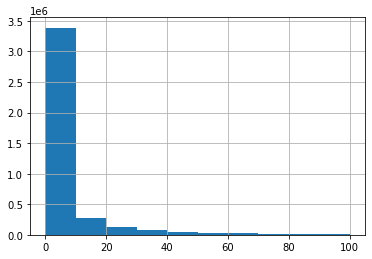

In [144]:
df_test['u_in'].hist()

In [60]:
df_test = add_features(df_test)

In [61]:
ss3 = StandardScaler().fit(df_test)
df_test = ss3.transform(df_test)

In [222]:
#df_test = df_test.drop(columns=['id', 'breath_id'])
#predict = dt2.predict(df_test)
predict = cb1.predict(df_test)

In [223]:
id_id = pd.read_csv("id_id.csv")
id_id.head()
#predict.to_csv(r'sample_submission.csv', sep=',', header=False, index=False)

,id,pressure
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [224]:
df = pd.DataFrame({
                    'id': id_id['id'],
                    'pressure': predict,
                  })

In [225]:
df.head()

,id,pressure
0,1,4.849905
1,2,4.789774
2,3,5.902449
3,4,6.689258
4,5,8.037942


In [226]:
df.shape

(4024000, 2)

In [227]:
df.to_csv('sample_submission.csv', index=False)